<h2 align="center"><b>Комп'ютерний практикум №2</b></h2>
<h5 align="right">Роботу виконав Беркута Володимир</h5>
<p><b>Мета роботи:</b> познайомитися з роботою поширених методів сортування, з критеріями та методикою їх порівняння.</br></p>

<h3 align="center"><b>2.1. Теоретичні відомості</b></h3>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Серед критеріїв, за якими порівнюються методи сортування мвсивів, розрізняються:</p>
<ol>
    <dd>
        <li><b>C</b>(від <b>compare</b>) - кількість порівнянь ключів між собою;</li>
        <li><b>M</b>(від <b>move</b>) - кількість операцій перезапису елементів з місця на місце у оперативний пам'яті або кількість обмінів;</li>
        <li><b>T</b>(від <b>time</b>) - загальний час роботи процедури.</li>
    </dd>
</ol>

$$C_{сер}=\sum_{i=2}^{n} \dfrac{i}{2}=\dfrac{(2+3+...+n)}{2}=\dfrac{(2+n)(n-1)}{4}=O(n^2)$$
$$C_{min}=n-1 ; \qquad C_{max}=\dfrac{(n-1)n}{2}.$$
$$M_{min}=0; \qquad M_{max}=\dfrac{(n-1)n}{2}; \qquad M_{сер}=\dfrac{(n-1)n}{4}$$

<h2 align="center"><b>Умови завдань:</b></h2>
<h5 align="right">Варіант №1</h5>
<p style="margin-left: 50px">Простий метод сортування: "Вставками"; Складний метод сортування: "Метод Шелла".</p>

In [6]:
import ipywidgets as widgets
import numpy as np
import time

In [7]:
def insertion_sort(l):
    n = len(l)
    c, m = 0, 0
    
    for i in range(1, n):
        key = l[i]
        j = i-1
        while j >= 0 and key < l[j]:
            c += 1
            l[j+1] = l[j]
            m += 1
            j -= 1
        l[j+1] = key
        c += 1
                
    return c, m

In [19]:
def knuth(n):
    h = 1
    while h < n//3:
        h = 3*h+1
    return h

print(knuth(100))

40


In [32]:
def shell_sort(l):
    c, m = 0, 0
    ki = knuth(len(l))
    n = len(l)
    
    while ki > 0:
 
        for i in range(ki,n):
            
            temp = l[i]
            j = i
            while j >= ki and l[j-ki] >temp:
                c += 1
                l[j] = l[j-ki]
                m += 1
                j -= ki
            l[j] = temp
            m += 1
            c += 1
        ki //= 3
    return c, m

In [33]:
def get_random(n):
    return list( np.random.randint(-n, n, n) )

In [34]:
lst_100 = get_random(100)
print(f"{lst_100}")

# Insertion sort
start = time.time()
S_c_100, S_m_100 = insertion_sort(lst_100)
S_time_100 = time.time() - start

start = time.time()
S_c_1000, S_m_1000 = insertion_sort(get_random(1000))
S_time_1000 = time.time() - start

start = time.time()
S_c_10000, S_m_10000 = insertion_sort(get_random(10000))
S_time_10000 = time.time() - start

# Shell sort
start = time.time()
C_c_100, C_m_100 = shell_sort(get_random(100))
C_time_100 = time.time() - start

start = time.time()
C_c_1000, C_m_1000 = shell_sort(get_random(1000))
C_time_1000 = time.time() - start

start = time.time()
C_c_10000, C_m_10000 = shell_sort(get_random(10000))
C_time_10000 = time.time() - start


[-67, -82, -5, 14, 67, 8, 36, -26, -40, -11, 90, -82, -93, -97, 11, 66, -39, 22, 6, -27, 55, -97, 92, -44, 18, 12, 87, 3, 44, -14, 3, -74, 67, 28, -78, 47, 55, -16, -89, 49, 50, 33, 69, -1, -31, 24, 17, 8, 86, -29, -40, -6, 48, 47, 50, -25, 50, -59, -30, -60, -72, 11, -36, 66, -8, 59, 88, -60, -16, -52, 0, 86, -9, 4, -8, -51, -55, -7, -11, -32, -91, 64, 84, -86, 55, -50, 93, 4, 93, -14, 25, 23, 51, -26, -73, 1, 23, -9, 79, 64]


In [35]:
out = widgets.HTML()
out.value = f"""
<table border="1">
  <thead>
    <tr>
      <th rowspan="3">№</th>
      <th colspan="5">Метод вставками</th>
      <th colspan="5">Метод Шелла</th>
    </tr>
    <tr>
      <th colspan="2">К-ть копіювань (M)</th>
      <th colspan="2">К-ть порівнянь (C)</th>
      <th rowspan="2">Час (T)</th>
      <th colspan="2">К-ть копіювань (M)</th>
      <th colspan="2">К-ть порівнянь (C)</th>
      <th rowspan="2">Час (T)</th>
    </tr>
    <tr>
      <th>Теор.</th>
      <th>Експерим.</th>
      <th>Теор.</th>
      <th>Експерим.</th>
      <th>Теор.</th>
      <th>Експерим.</th>
      <th>Теор.</th>
      <th>Експерим.</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>100</td>
      <td>{(100-1)*100/4}</td>
      <td>{S_m_100}</td>
      <td>{sum(range(2, 101))/2}</td>
      <td>{S_c_100}</td>
      <td>{round(S_time_100, 5)}</td>
      <td>{int(100**(6/5))}</td>
      <td>{C_m_100}</td>
      <td>{int(100**(6/5))}</td>
      <td>{C_c_100}</td>
      <td>{round(C_time_100, 5)}</td>
    </tr>
    <tr>
      <td>1000</td>
      <td>{(1000-1)*1000/4}</td>
      <td>{S_m_1000}</td>
      <td>{sum(range(2, 1001))/2}</td>
      <td>{S_c_1000}</td>
      <td>{round(S_time_1000, 5)}</td>
      <td>{int(1000**(6/5))}</td>
      <td>{C_m_1000}</td>
      <td>{int(1000**(6/5))}</td>
      <td>{C_c_1000}</td>
      <td>{round(C_time_1000, 5)}</td>
    </tr>
    <tr>
      <td>10000</td>
      <td>{(10000-1)*10000/4}</td>
      <td>{S_m_10000}</td>
      <td>{sum(range(2, 10001))/2}</td>
      <td>{S_c_10000}</td>
      <td>{round(S_time_10000, 5)}</td>
      <td>{int(10000**(6/5))}</td>
      <td>{round(C_m_10000, 5)}</td>
      <td>{int(10000**(6/5))}</td>
      <td>{C_c_10000}</td>
      <td>{round(C_time_10000, 5)}</td>
    </tr>
  </tbody>
</table>
"""
display(out)

HTML(value='\n<table border="1">\n  <thead>\n    <tr>\n      <th rowspan="3">№</th>\n      <th colspan="5">Мет…

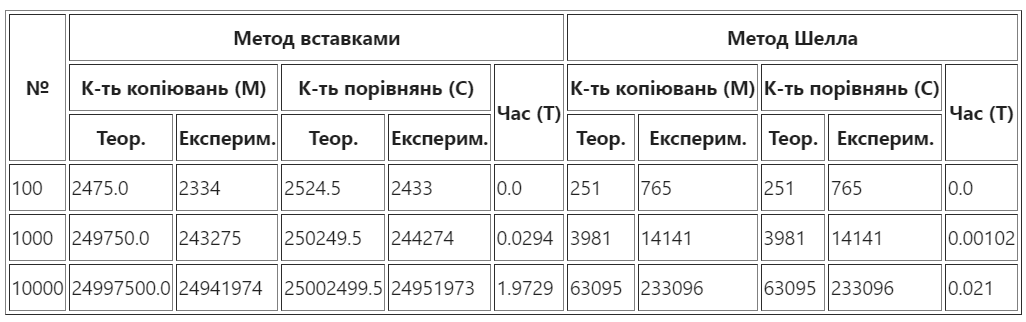